## Create a map of Modis (3-Day) SST with SSMI Ice overlay for Arctic

This was a Salo product that used to be made.

Grab three days of SST data and make a composite plot (averaging where multiple pixels are)
- Datasets from PODACC
- seems following page needs to be open for data to transfer - https://nsidc.org/data/NSIDC-0081/versions/1

In [135]:
%matplotlib inline

In [136]:
#using xarray for data read
import xarray as xr
import numpy as np
import pandas as pd
#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean
import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [137]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')
cmap = cmocean.cm.thermal


In [138]:
server='https://coastwatch.pfeg.noaa.gov/erddap',
protocol='tabledap',


dataset_id = 'erdMBsstd1day'
response = 'nc'

res = '4km' #4km or 9km
maxdays=14
threddspath =(maxdays+1)*[None]
time_start_doy =(maxdays+1)*[None]

for i in range(0,maxdays):
    time_start_doy[i+1]= (datetime.datetime.today()-datetime.timedelta(days=maxdays-i)).strftime('%j')
    threddspath[i+1] =f'https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/{res}/daily/2019/{time_start_doy[i+1]}/A{time_start_year}{time_start_doy[i+1]}.L3m_DAY_SST_sst_{res}.nc'

time_end= (datetime.datetime.today()-datetime.timedelta(days=0)).strftime('%Y-%m-%d')

#--
threddspath[1]

'https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/227/A2019227.L3m_DAY_SST_sst_4km.nc'

In [139]:
with xr.open_dataset(threddspath_1) as ds:
    print(ds.keys())

KeysView(<xarray.Dataset>
Dimensions:   (eightbitcolor: 256, lat: 2160, lon: 4320, rgb: 3)
Coordinates:
  * lat       (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * lon       (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette   (rgb, eightbitcolor) int8 ...
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
Attributes:
    _NCProperties:                    version=1|netcdflibversion=4.4.1.1|hdf5...
    product_name:                     A2019238.L3m_DAY_SST_sst_9km.nc
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   day
    processing_version:               2014.0.1QL
    date_created:                     2019-08-27T08:28:24.000Z


https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/227/A2019227.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/228/A2019228.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/229/A2019229.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/230/A2019230.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/231/A2019231.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/232/A2019232.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/233/A2019233.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTe

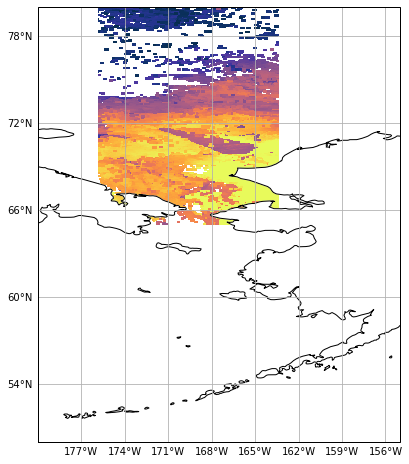

In [140]:
fig,ax = make_map(projection=ccrs.PlateCarree(-160))
for i in range(0,maxdays):
    print(threddspath[i+1])
    xdf = xa.open_dataset(threddspath[i+1])
    xadf1 = xdf.isel(lat=slice(100,600),lon=slice(100,400))
    plt.pcolormesh(xadf1.lon,xadf1.lat,xadf1.sst,vmin=-2,vmax=10,transform=ccrs.PlateCarree(),cmap=cmap)

    
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)




### SSMI decoder

In [141]:
def decode_datafile(filename,datasource='NRT'):
    icefile = open(filename, 'rb')

    if datasource is 'NRT':
       #remove the header
       icefile.seek(300)
       ice = np.fromfile(icefile,dtype=np.uint8)
       ice[ice >= 253] = 0
       ice = ice/2.5
    elif datasource is 'Bootstrap':
       #no header
       ice = np.fromfile(icefile,dtype=np.uint16)
       ice = ice/10.
       ice[ice == 110] = 0 #110 is land
       ice[ice == 120] = 100 #120 is polar hole
    else:
       ice=np.nan

    return ice;


def get_date(filename):
    icefile = open(filename, 'rb')
    header = icefile.read(300)
    #the date is located btw the following bytes
    date = date=header[219:229].decode() #gets date from header
    date = dt.datetime.strptime(date,"%m/%d/%Y")
    return date;

def decode_latlon(filename):
    latlon_file = open(filename, 'rb')
    output = np.fromfile(latlon_file,dtype='<i4')
    output = output/100000.0
    return output;

In [142]:
fp = '/Users/bell/in_and_outbox/data_sets/nrt_nasatime_seaice/nt_20190828_f18_nrt_n.bin'
ice = decode_datafile(fp,datasource='NRT')

In [143]:
lats_fp='data/psn25lats_v3.dat'
lats = decode_latlon(lats_fp)
lons_fp='data/psn25lons_v3.dat'
lons = decode_latlon(lons_fp)

In [144]:
data={'latitude':decode_latlon(lats_fp), 'longitude':decode_latlon(lons_fp),
      'ice_conc':decode_datafile(fp,'NRT')}
df=pd.DataFrame(data)
df['ice_conc'][df['ice_conc']==0] = np.nan

In [145]:
### Remapping the modes from the analysis
from scipy import interpolate

#-- Now let's grid your data.
# First we'll make a regular grid to interpolate onto. This is equivalent to
# your call to `mgrid`, but it's broken down a bit to make it easier to
# understand. 

#The number of columns and rows can be directly linked to the grid resolution
#360 cols would be 1deg resolution... 180 cols would be 2deg resolution
#the more columns, the slower the gridding process but the smoother the plot.  Too
#many columns will lead to oversampling so .25x.25 is probably the highest I would go

numcols, numrows = 360*4, 90*4
xi = np.linspace(df.longitude.min(), df.longitude.max(), numcols)
yi = np.linspace(df.latitude.min(), df.latitude.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

#-- Interpolate at the points in xi, yi
# "griddata" expects "raw" numpy arrays, so we'll pass in
# data.x.values instead of just the pandas series data.x

# regridding data with 0's removed data
x, y, z = df.longitude.values, df.latitude.values, df.ice_conc.values
zi = interpolate.griddata((x, y),z, (xi, yi), method='linear')

https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/227/A2019227.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/228/A2019228.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/229/A2019229.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/230/A2019230.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/231/A2019231.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/232/A2019232.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTemperature/modis/L3/aqua/11um/v2014.0/4km/daily/2019/233/A2019233.L3m_DAY_SST_sst_4km.nc
https://opendap.jpl.nasa.gov:443/opendap/OceanTe

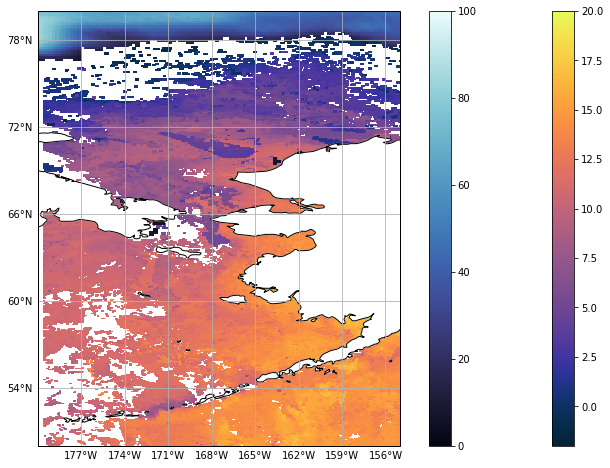

In [148]:
fig,ax = make_map(projection=ccrs.PlateCarree(-160))
for i in range(0,maxdays):
    print(threddspath[i+1])
    xdf = xa.open_dataset(threddspath[i+1])
    xadf1 = xdf.isel(lat=slice(10,1200),lon=slice(10,800))
    cmt = plt.pcolormesh(xadf1.lon,xadf1.lat,xadf1.sst,vmin=-2,vmax=20,transform=ccrs.PlateCarree(),cmap=cmap)
plt.colorbar(cmt)

    
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

cm = ax.pcolormesh(xi,yi,zi,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice, vmin=0, vmax=100)
plt.colorbar(cm)

extent = [-180, -155, 50, 80]
ax.set_extent(extent)


In [149]:
fig.savefig('Modis_SSMI_Composit.png')

### compare to MUR

In [151]:
mur_file = 'https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2019/240/20190828090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'

In [157]:
fig,ax = make_map(projection=ccrs.PlateCarree(-160))

xdf = xa.open_dataset(mur_file)

In [160]:
xdf.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 17999, lon: 36000)>
[647964000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2019-08-28T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -179.99 -179.98 -179.97 ... 179.98 179.99 180.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        Interim near-real-time (nrt) version using Multi-Resoluti...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO, A...

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

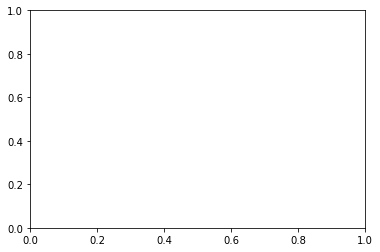

In [161]:
cmt = plt.pcolormesh(xdf.lon,xdf.lat,xdf.analysed_sst,transform=ccrs.PlateCarree(),cmap=cmap)